In [634]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [635]:
cheese_setlists = pd.read_json("data/cheese_nugs.json")

## Clean up City names and Venue

### First identify all unique city names

In [636]:
cheese_setlists["eventCity"].unique()


array(['Vegas', 'Eureka', 'Oak', 'Francisco', 'Salem', 'Claire',
       'Jacksonville', 'Vail', 'Heights', 'Rapids', 'Junction',
       'Morrison', 'Rothbury', 'Cincinnati', 'Lewiston', 'Newark',
       'Portland', 'Columbia', 'Pelham', 'Swanzey', 'Nashville', 'Omaha',
       'Chesterfield', 'Charlotte', 'Raleigh', 'Wilmington', 'Tempe',
       'Mar', 'Aspen', 'Angeles', 'Atlanta', 'Chicago', 'Morelos',
       'Chester', 'Brooklyn', 'Philadelphia', 'Baltimore', 'LaFayette',
       'Louisville', 'Waukee', 'Milwaukee', 'City', 'Felton', 'Carnation',
       None, 'Bonner', 'Jackson', 'Mountain', 'Chillicothe', 'Pittsburgh',
       'Boston', 'Burnet', 'Charlottesville', 'Oakland', 'Austin',
       'Noblesville', 'Clarkston', 'Falls', 'Springs', 'Hills',
       'Mansfield', 'Thorpe', 'Richmond', 'Palmer', 'Sandy', 'Sandpoint',
       'Eugene', 'Billings', 'Nampa', 'Troutdale', 'Bend', 'Dillon',
       'Telluride', 'Laytonville', 'Asheville', 'Paul', 'Madison',
       'Ozark', 'Tucson', 'Bay

### Clean up City names setlists

In [637]:
cleaned_cheese_setlists = cheese_setlists.copy()


In [639]:
def cleanSetlist(df, city):
    temp = df.copy()
    extractedName = temp[temp["eventCity"] == city]["venue"].str.extract(r"\b(\w+)$")[0].unique()

    if (len(extractedName) == 1):
        correctedName = extractedName[0] + " " + city
        temp.loc[temp["eventCity"] == city, "eventCity"] = correctedName
        temp.loc[temp["eventCity"] == correctedName, "venue"] = temp['venue'].str.replace(r'\s+\S+$', '', regex=True)
    else:
        print(f"Found more than one unique name for {city}")

    return temp

In [640]:
# "Springs", "Bay"
names_to_correct = ["Vegas", "Francisco", "Claire", "Junction", "Falls", "Hills", "Cruz", "Grove", "Orleans", "Park", "County", "Diego", "York", "Plains", "Shores", "Beach", "Lakes", "Margarita", "Hole", "Arbor", "Fe", "Rock", "Hill", "Bluffs", "Collins"]

In [641]:
for name in names_to_correct:
    cleaned_cheese_setlists = cleanSetlist(cleaned_cheese_setlists, name)

#### Miscellaneous Names
The below are some of the events that were incorrectly scrapped for information, and/or had multiple possibilities of what could be the correct value and fixed as a "one-off"

In [642]:
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Saratoga Performing Arts Center Saratoga", "eventCity"] = "Saratoga Springs"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Saratoga Springs", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "The Meadows Steamboat", "eventCity"] = "Steamboat Springs"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Steamboat Springs", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Crystal Bay Club Casino Crystal", "eventCity"] = "Crystal Bay"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Crystal Bay", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Jewel Paradise Cove Runaway", "eventCity"] = "Runaway Bay"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "International Incident Runaway", "eventCity"] = "Runaway Bay"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Runaway Bay", "eventCountry"] = "JM"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Runaway Bay", "eventState"] = "JM"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Runaway Bay", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Blues & Roots Music Festival Byron", "eventCity"] = "Byron Bay"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Byron Bay", "eventState"] = "AU"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Byron Bay", "eventCountry"] = "AU"

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Porland", "eventCity"] = "Portland"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Portland", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Edgefield Concerts", "eventCity"] = "Troutdale"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Edgefield Concerts", "eventState"] = "OR"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Edgefield Concerts", "venue"] = "McMenamins Historic Edgefield Manor"

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Festival", "eventCity"] = "Austin"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "AMD Stage Austin City Limits Music", "venue"] = "AMD Stage Austin City Limits"

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Bonnaroo", "eventCity"] = "Manchester"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["venue"] == "Which Stage", "venue"] = "Bonnaroo Farm"

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Mar", "eventCity"] = "Del Mar"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Del Mar", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Maya", "eventCity"] = "Riviera Maya"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Riviera Maya", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Riviera Maya", "eventCountry"] = "MX"

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Morelos", "eventCity"] = "Puerto Morelos"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Puerto Morelos", "eventState"] = "MX"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Puerto Morelos", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Puerto Morelos", "eventCountry"] = "MX"

cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Lomond", "eventCity"] = "Ben Lomond"
cleaned_cheese_setlists.loc[cleaned_cheese_setlists["eventCity"] == "Ben Lomond", "venue"] = cleaned_cheese_setlists['venue'].str.replace(r'\s+\S+$', '', regex=True)

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Vancouver") | (cleaned_cheese_setlists["eventCity"] == "Whistler") | (cleaned_cheese_setlists["eventCity"] == "Montreal") | (cleaned_cheese_setlists["eventCity"] == "Calgary") | (cleaned_cheese_setlists["eventCity"] == "Hamilton") | (cleaned_cheese_setlists["eventCity"] == "Pemberton") | (cleaned_cheese_setlists["eventCity"] == "Niagara Falls") | (cleaned_cheese_setlists["eventCity"] == "Princeton"), "eventCountry"] = "CA"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Niigata") | (cleaned_cheese_setlists["eventCity"] == "Tokyo") | (cleaned_cheese_setlists["eventCity"] == "Fukuoka") | (cleaned_cheese_setlists["eventCity"] == "Nagoya") | (cleaned_cheese_setlists["eventCity"] == "Osaka"), "eventCountry"] = "JP"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Niigata") | (cleaned_cheese_setlists["eventCity"] == "Tokyo") | (cleaned_cheese_setlists["eventCity"] == "Fukuoka") | (cleaned_cheese_setlists["eventCity"] == "Nagoya") | (cleaned_cheese_setlists["eventCity"] == "Osaka"), "eventState"] = "JP"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Manchester") | (cleaned_cheese_setlists["eventCity"] == "Nottingham") | (cleaned_cheese_setlists["eventCity"] == "Oxford") | (cleaned_cheese_setlists["eventCity"] == "Glasgow") | (cleaned_cheese_setlists["eventCity"] == "London"), "eventCountry"] = "UK"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Nottingham") | (cleaned_cheese_setlists["eventCity"] == "Oxford") | (cleaned_cheese_setlists["eventCity"] == "Glasgow") | (cleaned_cheese_setlists["eventCity"] == "London"), "eventState"] = "UK"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Amsterdam") | (cleaned_cheese_setlists["eventCity"] == "Hague"), "eventCountry"] = "NL"
cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Amsterdam") | (cleaned_cheese_setlists["eventCity"] == "Hague"), "eventState"] = "NL"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Cologne") | (cleaned_cheese_setlists["eventCity"] == "Munich") | (cleaned_cheese_setlists["eventCity"] == "Hamburg"), "eventCountry"] = "DE"
cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Cologne") | (cleaned_cheese_setlists["eventCity"] == "Munich") | (cleaned_cheese_setlists["eventCity"] == "Hamburg"), "eventState"] = "DE"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Milan"), "eventCountry"] = "IT"
cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Milan"), "eventState"] = "IT"

cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Interlaken"), "eventCountry"] = "CH"
cleaned_cheese_setlists.loc[(cleaned_cheese_setlists["eventCity"] == "Interlaken"), "eventState"] = "CH"

## Permutation Tests
### Create the helper methods to be used for each of the permutation tests

In [643]:
def countSongs(df):
    setList = df["setlist"].tolist()
    setList_len = []

    for i in range(len(setList)):
        set = setList[i]
        for x in range(len(set)):
            if not set[x]["encore"]:
                setList_len.append(len(set[x]["songs"]))

    return setList_len


In [645]:
def averageSetlistLength(df):
    setList = df["setlist"].tolist()
    setList_len = []

    for i in range(len(setList)):
        set = setList[i]
        for x in range(len(set)):
            if not set[x]["encore"]:
                setList_len.append(len(set[x]["songs"]))

    return sum(setList_len) / len(setList_len)


## Hypothesis 1
### Create the test statistic for Hypothesis 1

In [646]:
results = []

cleaned_cheese_setlists["before_jason"] = pd.to_datetime(cleaned_cheese_setlists["date"]) <= pd.to_datetime("2004-10-31")

setlist_length_stat = averageSetlistLength(cleaned_cheese_setlists.loc[cleaned_cheese_setlists["before_jason"] == True]) - averageSetlistLength(cleaned_cheese_setlists.loc[cleaned_cheese_setlists["before_jason"] == False])

print(f"setlist_length_stat: {setlist_length_stat}")


setlist_length_stat: 0.1055030749468564


### Simulation

In [647]:
sim_copy = cleaned_cheese_setlists.copy()
num_sim = 10_000
results = [setlist_length_stat]
before_jason_col = sim_copy['before_jason'].values


for _ in range(num_sim - 1):
    np.random.shuffle(before_jason_col)
    sim_copy['before_jason'] = before_jason_col

    results.append(averageSetlistLength(sim_copy.loc[sim_copy["before_jason"] == True]) - averageSetlistLength(sim_copy.loc[sim_copy["before_jason"] == False]))

p-value: 0.1909


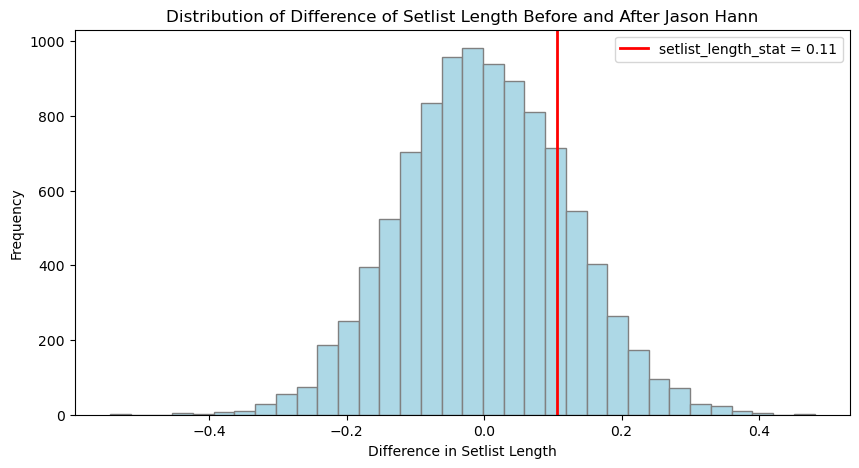

In [648]:
setlist_length_df = pd.DataFrame({"results": results})
plt.figure(figsize=(10,5))
plt.hist(setlist_length_df["results"], bins=34, color="lightblue", edgecolor="gray")

# print(f"len(setlist_length_df[setlist_length_df[\"results\"] >= setlist_length_stat]): {len(setlist_length_df[setlist_length_df["results"] >= setlist_length_stat])}")
print(f"p-value: {len(setlist_length_df[setlist_length_df["results"] >= setlist_length_stat])/num_sim}")
extreme = len(setlist_length_df[setlist_length_df["results"] >= setlist_length_stat])/num_sim
plt.axvline(setlist_length_stat, color="red", linewidth=2, label=f"setlist_length_stat = {setlist_length_stat:.2f}")
plt.title(f"Distribution of Difference of Setlist Length Before and After Jason Hann")
plt.xlabel(f"Difference in Setlist Length")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("results/permutation_diff_setlist_length.png")

In [649]:
def averageSongLength(df):
    setList = df["setlist"].tolist()
    song_time_length = []

    for i in range(len(setList)):
        set = setList[i]
        for x in range(len(set)):
            for song in set[x]["songs"]:
                song_time_length.append((song["length"]["minutes"] * 60) + (song["length"]["seconds"]))

    return sum(song_time_length) / len(song_time_length)

## Hypothesis 2

### Create the test statistic for Hypothesis 2

In [650]:
average_song_length_stat = averageSongLength(cleaned_cheese_setlists.loc[cleaned_cheese_setlists["before_jason"] == False]) - averageSongLength(cleaned_cheese_setlists.loc[cleaned_cheese_setlists["before_jason"] == True])
print(f"average_song_length_stat: {average_song_length_stat}")

average_song_length_stat: 26.559765015168637


### Simulation

In [651]:
sim_copy = cleaned_cheese_setlists.copy()
num_sim = 10_000
results = [average_song_length_stat]
before_jason_col = sim_copy['before_jason'].values


for _ in range(num_sim - 1):
    np.random.shuffle(before_jason_col)
    sim_copy['before_jason'] = before_jason_col

    # results.append(averageSetlistLength(sim_copy.loc[sim_copy["before_jason"] == True]) - averageSetlistLength(sim_copy.loc[sim_copy["before_jason"] == False]))
    results.append(averageSongLength(sim_copy.loc[sim_copy["before_jason"] == False]) - averageSongLength(sim_copy.loc[sim_copy["before_jason"] == True]))

len(average_song_length_df[average_song_length_df["results"] >= average_song_length_stat]): 1
p-value: 0.0001


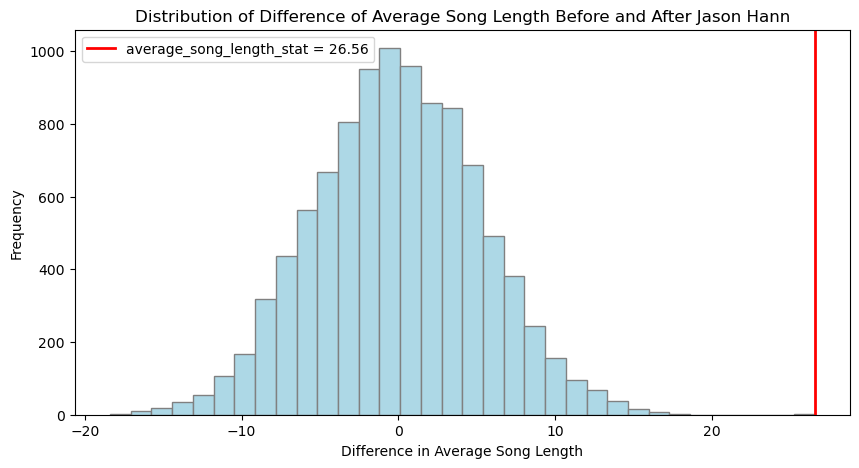

In [652]:
average_song_length_df = pd.DataFrame({"results": results})
plt.figure(figsize=(10,5))
plt.hist(average_song_length_df["results"], bins=34, color="lightblue", edgecolor="gray")

print(f"len(average_song_length_df[average_song_length_df[\"results\"] >= average_song_length_stat]): {len(average_song_length_df[average_song_length_df["results"] >= average_song_length_stat])}")
print(f"p-value: {len(average_song_length_df[average_song_length_df["results"] >= average_song_length_stat])/num_sim}")
extreme = len(average_song_length_df[average_song_length_df["results"] >= average_song_length_stat])/num_sim
plt.axvline(average_song_length_stat, color="red", linewidth=2, label=f"average_song_length_stat = {average_song_length_stat:.2f}")
plt.title(f"Distribution of Difference of Average Song Length Before and After Jason Hann")
plt.xlabel(f"Difference in Average Song Length")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("results/permutation_avg_song_length.png")

## Bootstrap Uncertainty Intervals

## Bootstrap 1
### Create the derived column `region`

In [653]:
west = ["AK", "AZ", "CA", "CO", "HI", "ID", "MT", "NV", "NM", "OR", "UT", "WA", "WY"]
east = ["CT", "ME", "MA", "NH", "NJ", "NY", "PA", "RI", "VT"]
midwest = ["IL", "IN", "IA", "KS", "MI", "MN", "MO", "NE", "ND", "OH", "SD", "WI"]
south = ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV", "DC"]
international = ["MX", "JM", "JP", "DE", "IT", "UK", "NL", "CH", "AU", "CA"]

sim_copy = cleaned_cheese_setlists.copy()

sim_copy.loc[sim_copy["eventState"].isin(west), "region"] = "west"
sim_copy.loc[sim_copy["eventState"].isin(east), "region"] = "east"
sim_copy.loc[sim_copy["eventState"].isin(midwest), "region"] = "midwest"
sim_copy.loc[sim_copy["eventState"].isin(south), "region"] = "south"
sim_copy.loc[sim_copy["eventCountry"].isin(international), "region"] = "international"

In [654]:
results = []

for _ in range(num_sim):
    simulated_sample = sim_copy.sample(frac=1, replace=True)
    results.append( (simulated_sample.groupby("region").size())/(len(sim_copy)) )


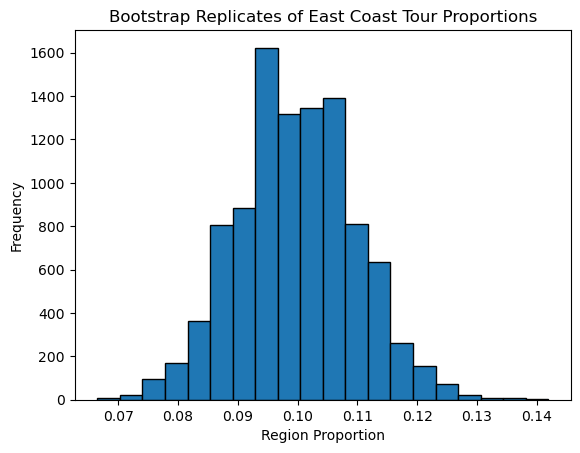

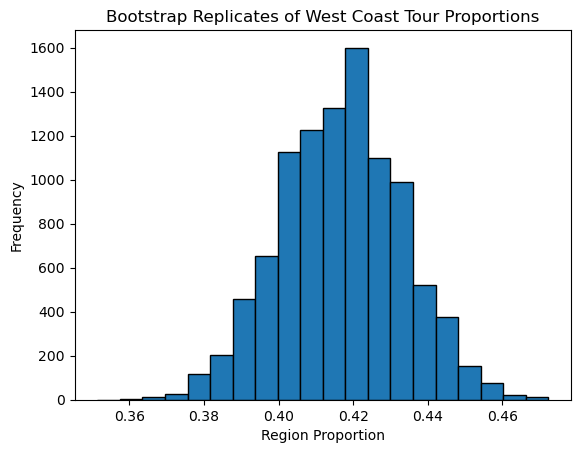

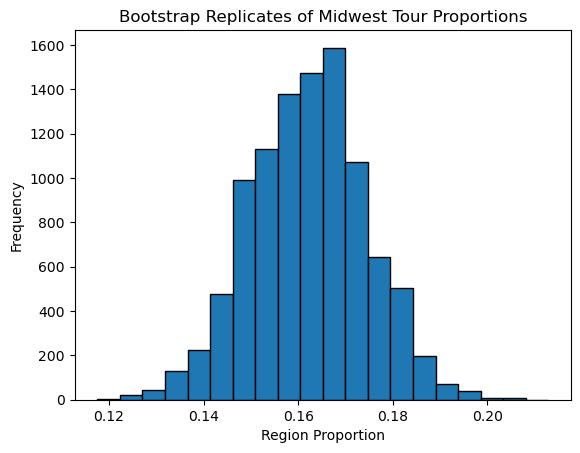

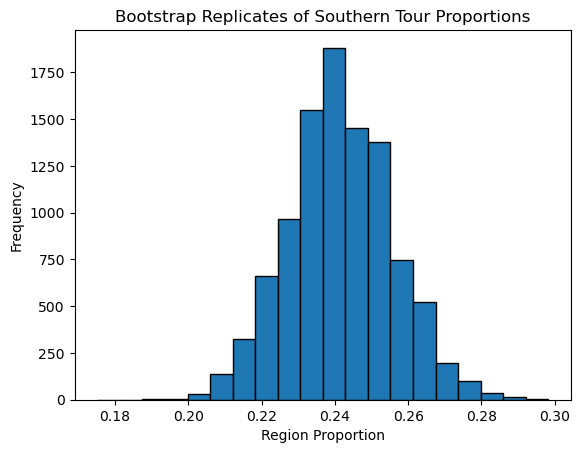

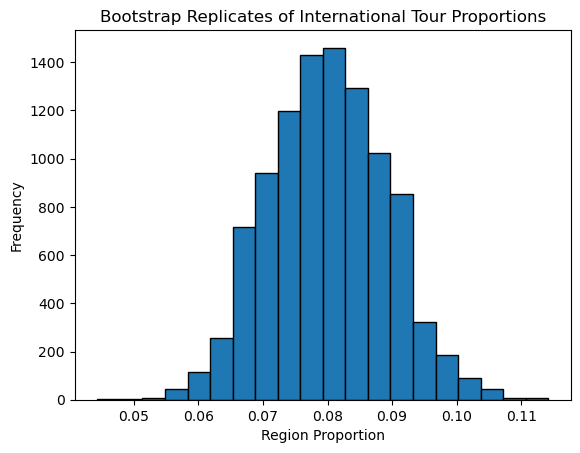

In [660]:
df = pd.DataFrame(results)

plt.hist(df["east"], bins=20, edgecolor='black')
plt.xlabel("Region Proportion")
plt.ylabel("Frequency")
plt.title("Bootstrap Replicates of East Coast Tour Proportions")
plt.savefig("results/bootstrap_region_east.png")
plt.show()

plt.hist(df["west"], bins=20, edgecolor='black')
plt.xlabel("Region Proportion")
plt.ylabel("Frequency")
plt.title("Bootstrap Replicates of West Coast Tour Proportions")
plt.savefig("results/bootstrap_region_west.png")
plt.show()

plt.hist(df["midwest"], bins=20, edgecolor='black')
plt.xlabel("Region Proportion")
plt.ylabel("Frequency")
plt.title("Bootstrap Replicates of Midwest Tour Proportions")
plt.savefig("results/bootstrap_region_midwest.png")
plt.show()

plt.hist(df["south"], bins=20, edgecolor='black')
plt.xlabel("Region Proportion")
plt.ylabel("Frequency")
plt.title("Bootstrap Replicates of Southern Tour Proportions")
plt.savefig("results/bootstrap_region_south.png")
plt.show()

plt.hist(df["international"], bins=20, edgecolor='black')
plt.xlabel("Region Proportion")
plt.ylabel("Frequency")
plt.title("Bootstrap Replicates of International Tour Proportions")
plt.savefig("results/bootstrap_region_proportions.png")
plt.show()


In [661]:
mean = df.mean().reset_index().rename(columns={0:"tour_region_proportion"})
quantile = df.quantile([0.025, 0.975])
quantile_t = quantile.T

summary = pd.merge(mean, quantile_t, on="region")

summary.to_csv('results/bootstrap_region_proportions.csv')

In [662]:
def getShowOpener(df):
    setlist = df["setlist"].tolist()[0]

    if setlist and isinstance(setlist[0], dict):
        song = setlist[0]["songs"][0]["name"]
        if song == "Intro" or song == "Chatter":
            return setlist[0]["songs"][1]["name"]
        else:
            return song

    return ""


In [663]:
show_openers = []

for i in range(len(sim_copy)):
    show_openers.append( getShowOpener(sim_copy.iloc[[i]]) )


In [664]:
print(len(show_openers) == len(cleaned_cheese_setlists))

True


In [665]:
results = []
for _ in range(num_sim):
        # RESAMPLE SIZE MUST BE N_filtered
        sample = np.random.choice(show_openers, size=len(show_openers), replace=True)

        # Calculate the Mode for the Resample (Steps D, E, F remain the same)
        counts = Counter(sample)
        if counts:

            # Get the frequent song in the sample and append to results
            mode_song, _ = counts.most_common(1)[0]
            results.append(mode_song)

In [666]:

# Final count of the values in the results array
results_count = Counter(results)

# Get the most frequent opening song, and get the number of times it appears in the simulation
most_played_opener, opener_count = results_count.most_common(1)[0]

# Calculate percentage in simulation
mode_percent = opener_count / num_sim * 100

mode_df = pd.DataFrame({ "most_played_opener": str(most_played_opener), "mode_percent": mode_percent }, index=[0])

mode_df.to_csv('results/bootstrap_song_opener.csv')
